In [71]:
import pandas as pd
import numpy as np

In [72]:
df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')

In [73]:
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [74]:
df = df[['OriginalTweet', 'Sentiment']]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['OriginalTweet'], df['Sentiment'], test_size=0.2, random_state=42)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_bow = vectorizer.transform(X_test) 

In [77]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
print("Naïve Bayes Results:")
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)
evaluate_model(nb_model, X_test_bow, y_test)

Naïve Bayes Results:
Accuracy: 0.46
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.67      0.22      0.33      1056
Extremely Positive       0.64      0.31      0.42      1330
          Negative       0.42      0.52      0.47      2006
           Neutral       0.77      0.28      0.41      1553
          Positive       0.40      0.72      0.51      2287

          accuracy                           0.46      8232
         macro avg       0.58      0.41      0.43      8232
      weighted avg       0.55      0.46      0.44      8232

Confusion Matrix:
[[ 234    5  638   15  164]
 [   2  412   70    9  837]
 [  91   35 1051   57  772]
 [  10   27  349  441  726]
 [  12  169  403   51 1652]]




In [79]:
from sklearn.linear_model import LogisticRegression
print("Logistic Regression Results:")
lr_model = LogisticRegression(max_iter= 500)
lr_model.fit(X_train_bow, y_train)
evaluate_model(lr_model, X_test_bow, y_test)

Logistic Regression Results:
Accuracy: 0.63
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.67      0.58      0.62      1056
Extremely Positive       0.72      0.64      0.68      1330
          Negative       0.56      0.55      0.56      2006
           Neutral       0.66      0.74      0.69      1553
          Positive       0.59      0.63      0.61      2287

          accuracy                           0.63      8232
         macro avg       0.64      0.63      0.63      8232
      weighted avg       0.63      0.63      0.63      8232

Confusion Matrix:
[[ 612   12  365   34   33]
 [   8  853   28   28  413]
 [ 240   49 1106  275  336]
 [  16   21  167 1143  206]
 [  41  249  299  260 1438]]




In [80]:
from sklearn.svm import SVC
print("SVM Results:")
from sklearn.svm import LinearSVC
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train_bow, y_train)
evaluate_model(svm_model, X_test_bow, y_test)

SVM Results:
Accuracy: 0.55
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.64      0.62      0.63      1056
Extremely Positive       0.65      0.65      0.65      1330
          Negative       0.48      0.45      0.46      2006
           Neutral       0.59      0.66      0.62      1553
          Positive       0.50      0.48      0.49      2287

          accuracy                           0.55      8232
         macro avg       0.57      0.57      0.57      8232
      weighted avg       0.55      0.55      0.55      8232

Confusion Matrix:
[[ 651   11  304   39   51]
 [   6  858   63   38  365]
 [ 291   67  907  300  441]
 [  28   29  203 1030  263]
 [  46  358  432  348 1103]]




In [81]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

In [82]:
import string
from nltk.corpus import stopwords
df_SWR = df[['OriginalTweet', 'Sentiment']].copy()
df_SWR.loc[:, 'OriginalTweet'] = df_SWR['OriginalTweet'].apply(preprocess_text)

In [83]:
X_train_SWR, X_test_SWR, y_train_SWR, y_test_SWR = train_test_split(df['OriginalTweet'], df['Sentiment'], test_size=0.3, random_state=42)

In [84]:
vectorizer = CountVectorizer()
X_train_SWR_bow = vectorizer.fit_transform(X_train_SWR) 
X_test_SWR_bow = vectorizer.transform(X_test_SWR)  

In [85]:
print("Naïve Bayes Results AFTER REMOVING STOPWORDS AND PUNCTUATIONS:")
nb_model = MultinomialNB()
nb_model.fit(X_train_SWR_bow, y_train_SWR)
evaluate_model(nb_model, X_test_SWR_bow, y_test_SWR)

Naïve Bayes Results AFTER REMOVING STOPWORDS AND PUNCTUATIONS:
Accuracy: 0.45
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.63      0.21      0.32      1572
Extremely Positive       0.62      0.31      0.41      1989
          Negative       0.41      0.51      0.45      3005
           Neutral       0.75      0.27      0.40      2292
          Positive       0.39      0.71      0.51      3490

          accuracy                           0.45     12348
         macro avg       0.56      0.40      0.42     12348
      weighted avg       0.53      0.45      0.43     12348

Confusion Matrix:
[[ 337    7  954   19  255]
 [   5  609   92   14 1269]
 [ 158   51 1538   83 1175]
 [  16   44  522  622 1088]
 [  18  266  653   92 2461]]




In [86]:
print("Logistic Regression Results AFTER REMOVING STOPWORDS AND PUNCTUATIONS:")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_SWR_bow, y_train_SWR)
evaluate_model(lr_model, X_test_SWR_bow, y_test_SWR)

Logistic Regression Results AFTER REMOVING STOPWORDS AND PUNCTUATIONS:
Accuracy: 0.61
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.65      0.58      0.61      1572
Extremely Positive       0.69      0.62      0.65      1989
          Negative       0.54      0.53      0.54      3005
           Neutral       0.63      0.74      0.68      2292
          Positive       0.58      0.59      0.58      3490

          accuracy                           0.61     12348
         macro avg       0.62      0.61      0.61     12348
      weighted avg       0.61      0.61      0.60     12348

Confusion Matrix:
[[ 905   24  533   60   50]
 [  11 1232   43   50  653]
 [ 398   76 1600  432  499]
 [  16   26  266 1686  298]
 [  70  416  513  435 2056]]




In [87]:
print("SVM Results AFTER REMOVING STOPWORDS AND PUNCTUATIONS:")
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train_SWR_bow, y_train_SWR)
evaluate_model(svm_model, X_test_SWR_bow, y_test_SWR)

SVM Results AFTER REMOVING STOPWORDS AND PUNCTUATIONS:
Accuracy: 0.54
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.60      0.61      0.60      1572
Extremely Positive       0.64      0.63      0.64      1989
          Negative       0.46      0.43      0.44      3005
           Neutral       0.58      0.68      0.62      2292
          Positive       0.50      0.47      0.48      3490

          accuracy                           0.54     12348
         macro avg       0.55      0.56      0.56     12348
      weighted avg       0.54      0.54      0.54     12348

Confusion Matrix:
[[ 956   18  447   63   88]
 [  15 1256   90   56  572]
 [ 509   98 1287  463  648]
 [  33   41  300 1553  365]
 [  87  545  673  545 1640]]




In [88]:
df['OriginalTweet'] = df['OriginalTweet'].str.lower()

In [89]:
X_train_LC, X_test_LC, y_train_LC, y_test_LC = train_test_split(
    df['OriginalTweet'], df['Sentiment'], test_size=0.2, random_state=42
)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_LC_bow = vectorizer.fit_transform(X_train_LC)  # Fit and transform training data
X_test_LC_bow = vectorizer.transform(X_test_LC) 

In [91]:
print("Naïve Bayes Results FOR LOWER CASE:")
nb_model = MultinomialNB()
nb_model.fit(X_train_LC_bow, y_train_LC)
evaluate_model(nb_model, X_test_LC_bow, y_test_LC)

Naïve Bayes Results FOR LOWER CASE:
Accuracy: 0.46
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.67      0.22      0.33      1056
Extremely Positive       0.64      0.31      0.42      1330
          Negative       0.42      0.52      0.47      2006
           Neutral       0.77      0.28      0.41      1553
          Positive       0.40      0.72      0.51      2287

          accuracy                           0.46      8232
         macro avg       0.58      0.41      0.43      8232
      weighted avg       0.55      0.46      0.44      8232

Confusion Matrix:
[[ 234    5  638   15  164]
 [   2  412   70    9  837]
 [  91   35 1051   57  772]
 [  10   27  349  441  726]
 [  12  169  403   51 1652]]




In [92]:
print("Logistic Regression Results AFTER CHANGING TO LOWER CASE:")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_LC_bow, y_train_LC)
evaluate_model(lr_model, X_test_LC_bow, y_test_LC)

Logistic Regression Results AFTER CHANGING TO LOWER CASE:
Accuracy: 0.63
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.67      0.58      0.62      1056
Extremely Positive       0.72      0.64      0.68      1330
          Negative       0.56      0.55      0.56      2006
           Neutral       0.66      0.74      0.69      1553
          Positive       0.59      0.63      0.61      2287

          accuracy                           0.63      8232
         macro avg       0.64      0.63      0.63      8232
      weighted avg       0.63      0.63      0.63      8232

Confusion Matrix:
[[ 612   12  365   34   33]
 [   8  853   28   28  413]
 [ 240   49 1106  275  336]
 [  16   21  167 1143  206]
 [  41  249  299  260 1438]]




In [94]:
print("SVM Results AFTER AFTER CHANGING TO LOWER CASE:")
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train_LC_bow, y_train_LC)
evaluate_model(svm_model, X_test_LC_bow, y_test_LC)

SVM Results AFTER AFTER CHANGING TO LOWER CASE:
Accuracy: 0.55
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.64      0.62      0.63      1056
Extremely Positive       0.65      0.65      0.65      1330
          Negative       0.48      0.45      0.46      2006
           Neutral       0.59      0.66      0.62      1553
          Positive       0.50      0.48      0.49      2287

          accuracy                           0.55      8232
         macro avg       0.57      0.57      0.57      8232
      weighted avg       0.55      0.55      0.55      8232

Confusion Matrix:
[[ 651   11  304   39   51]
 [   6  858   63   38  365]
 [ 291   67  907  300  441]
 [  28   29  203 1030  263]
 [  46  358  432  348 1103]]




In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [96]:
print("Naïve Bayes Results WITH TFIDF:")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
evaluate_model(nb_model, X_test_tfidf, y_test)

Naïve Bayes Results WITH TFIDF:
Accuracy: 0.36
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       1.00      0.01      0.02      1056
Extremely Positive       0.91      0.01      0.01      1330
          Negative       0.41      0.34      0.37      2006
           Neutral       0.81      0.04      0.08      1553
          Positive       0.33      0.94      0.49      2287

          accuracy                           0.36      8232
         macro avg       0.69      0.27      0.20      8232
      weighted avg       0.62      0.36      0.25      8232

Confusion Matrix:
[[  12    0  624    0  420]
 [   0   10   25    1 1294]
 [   0    0  684    9 1313]
 [   0    0  210   64 1279]
 [   0    1  128    5 2153]]




In [97]:
print("Logistic Regression Results WITH TFIDF:")
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train)
evaluate_model(lr_model, X_test_tfidf, y_test)

Logistic Regression Results WITH TFIDF:
Accuracy: 0.58
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.64      0.49      0.56      1056
Extremely Positive       0.67      0.56      0.61      1330
          Negative       0.52      0.53      0.52      2006
           Neutral       0.65      0.65      0.65      1553
          Positive       0.52      0.62      0.56      2287

          accuracy                           0.58      8232
         macro avg       0.60      0.57      0.58      8232
      weighted avg       0.58      0.58      0.58      8232

Confusion Matrix:
[[ 521   12  423   40   60]
 [   7  744   43   32  504]
 [ 225   53 1058  238  432]
 [  13   24  210 1004  302]
 [  50  280  318  231 1408]]




In [98]:
print("SVM Results AFTER AFTER CHANGING TO LOWER CASE:")
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train_tfidf, y_train)
evaluate_model(svm_model, X_test_tfidf, y_test)

SVM Results AFTER AFTER CHANGING TO LOWER CASE:
Accuracy: 0.57
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.60      0.63      0.61      1056
Extremely Positive       0.60      0.67      0.64      1330
          Negative       0.51      0.47      0.49      2006
           Neutral       0.65      0.65      0.65      1553
          Positive       0.51      0.50      0.51      2287

          accuracy                           0.57      8232
         macro avg       0.57      0.58      0.58      8232
      weighted avg       0.56      0.57      0.56      8232

Confusion Matrix:
[[ 663   14  312   28   39]
 [  12  891   42   27  358]
 [ 356   62  945  233  410]
 [  24   34  200 1010  285]
 [  52  475  345  266 1149]]




In [107]:
import numpy as np

# Updated data for three models
models = {
    'Naïve Bayes': {
        'classification_report': {
            'Extremely Negative': {'precision': 0.67, 'recall': 0.22, 'f1-score': 0.33, 'support': 1056},
            'Extremely Positive': {'precision': 0.64, 'recall': 0.31, 'f1-score': 0.42, 'support': 1330},
            'Negative': {'precision': 0.42, 'recall': 0.52, 'f1-score': 0.47, 'support': 2006},
            'Neutral': {'precision': 0.77, 'recall': 0.28, 'f1-score': 0.41, 'support': 1553},
            'Positive': {'precision': 0.40, 'recall': 0.72, 'f1-score': 0.51, 'support': 2287},
        },
        'confusion_matrix': np.array([
            [234, 5, 638, 15, 164],
            [2, 412, 70, 9, 837],
            [91, 35, 1051, 57, 772],
            [10, 27, 349, 441, 726],
            [12, 169, 403, 51, 1652]
        ])
    },
    'Logistic Regression': {
        'classification_report': {
            'Extremely Negative': {'precision': 0.67, 'recall': 0.58, 'f1-score': 0.62, 'support': 1056},
            'Extremely Positive': {'precision': 0.72, 'recall': 0.64, 'f1-score': 0.68, 'support': 1330},
            'Negative': {'precision': 0.56, 'recall': 0.55, 'f1-score': 0.56, 'support': 2006},
            'Neutral': {'precision': 0.66, 'recall': 0.74, 'f1-score': 0.69, 'support': 1553},
            'Positive': {'precision': 0.59, 'recall': 0.63, 'f1-score': 0.61, 'support': 2287},
        },
        'confusion_matrix': np.array([
            [612, 12, 365, 34, 33],
            [8, 853, 28, 28, 413],
            [240, 49, 1106, 275, 336],
            [16, 21, 167, 1143, 206],
            [41, 249, 299, 260, 1438]
        ])
    },
    'SVM': {
        'classification_report': {
            'Extremely Negative': {'precision': 0.64, 'recall': 0.62, 'f1-score': 0.63, 'support': 1056},
            'Extremely Positive': {'precision': 0.65, 'recall': 0.65, 'f1-score': 0.65, 'support': 1330},
            'Negative': {'precision': 0.48, 'recall': 0.45, 'f1-score': 0.46, 'support': 2006},
            'Neutral': {'precision': 0.59, 'recall': 0.66, 'f1-score': 0.62, 'support': 1553},
            'Positive': {'precision': 0.50, 'recall': 0.48, 'f1-score': 0.49, 'support': 2287},
        },
        'confusion_matrix': np.array([
            [651, 11, 304, 39, 51],
            [6, 858, 63, 38, 365],
            [291, 67, 907, 300, 441],
            [28, 29, 203, 1030, 263],
            [46, 358, 432, 348, 1103]
        ])
    }
}

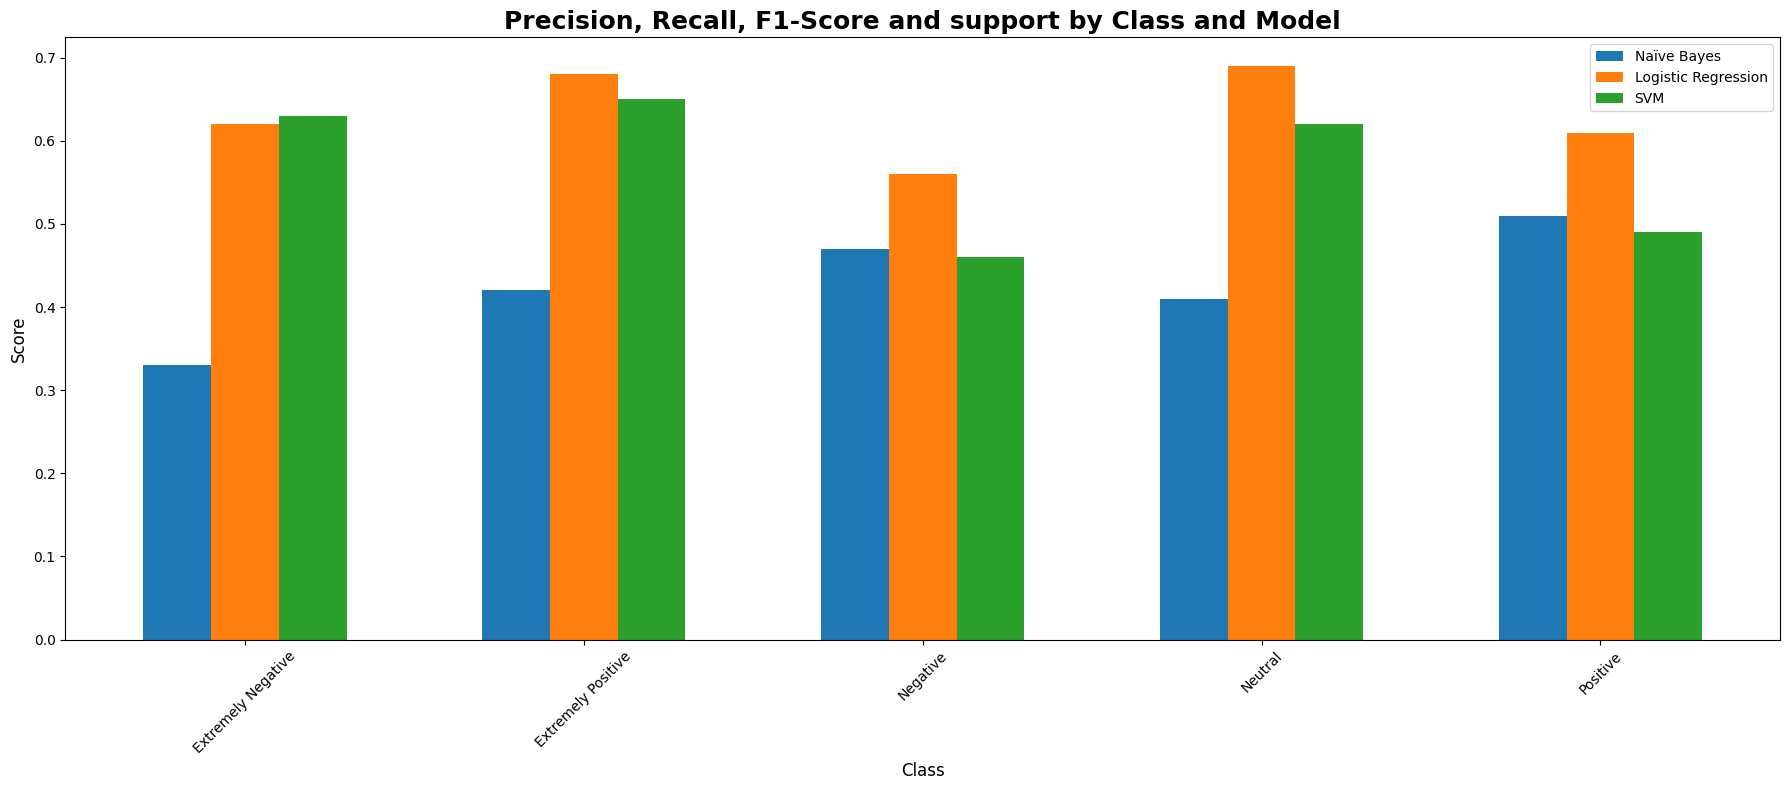

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels
classes = ['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive']
metrics = ['precision', 'recall', 'f1-score', 'support']

# Create a grouped bar plot for each metric
x = np.arange(len(classes))  # Class labels
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(18, 8))

# Plot bars for each model
for i, model_name in enumerate(models.keys()):
    metric_scores = [models[model_name]['classification_report'][cls][metric] for cls in classes]
    ax.bar(x + i * width, metric_scores, width, label=model_name)

# Customize the plot
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Precision, Recall, F1-Score and support by Class and Model', fontsize=18, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(classes, fontsize=10, rotation=45)
ax.legend(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

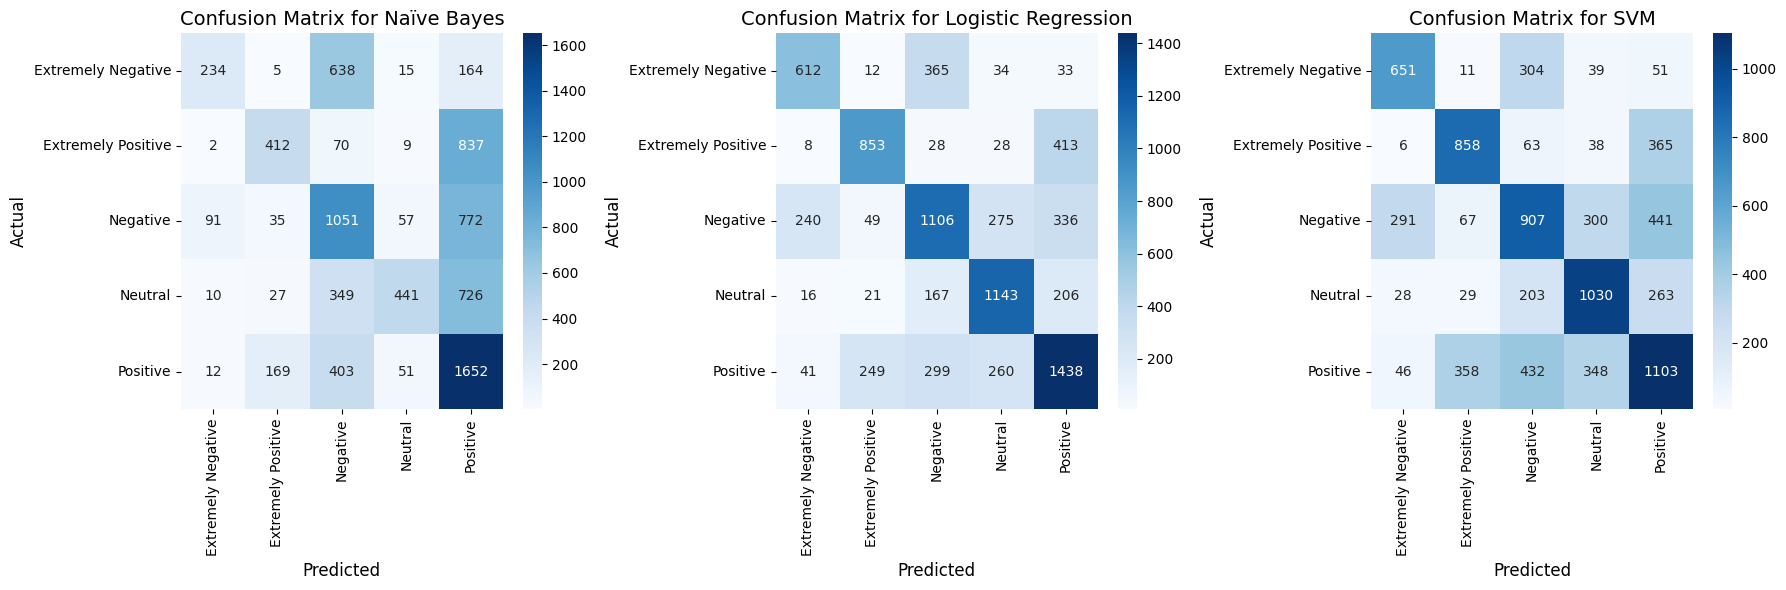

In [109]:
import seaborn as sns

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (model_name, model_data) in enumerate(models.items()):
    sns.heatmap(model_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {model_name}', fontsize=14)
    axes[i].set_xlabel('Predicted', fontsize=12)
    axes[i].set_ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()

In [102]:
# List of example tweets
tweets = [
    "This is the worst experience I've ever had. Terrible service!",  # Extremely Negative
    "The product is okay, but it could be better.",  # Neutral
    "I'm so happy with my purchase! Everything works perfectly.",  # Extremely Positive
    "I feel neutral about this. It's neither good nor bad.",  # Neutral
    "The service was fine, but nothing special."  # Neutral
]

# Check unique labels in the model
unique_labels = lr_model.classes_
print("Unique Labels:", unique_labels)

# Define sentiment_classes based on the model's output labels
if isinstance(unique_labels[0], str):
    # If the model outputs string labels directly
    sentiment_classes = {label: label for label in unique_labels}
else:
    # If the model outputs integer labels
    sentiment_classes = {
        0: 'Extremely Negative',
        1: 'Extremely Positive',
        2: 'Negative',
        3: 'Neutral',
        4: 'Positive'
    }

# Classify each tweet
for tweet in tweets:
    preprocessed_tweet = preprocess_text(tweet)
    tweet_features = vectorizer.transform([preprocessed_tweet])
    predicted_sentiment = lr_model.predict(tweet_features)
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment_classes[predicted_sentiment[0]]}")
    print()

Unique Labels: ['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']
Tweet: This is the worst experience I've ever had. Terrible service!
Predicted Sentiment: Extremely Negative

Tweet: The product is okay, but it could be better.
Predicted Sentiment: Extremely Positive

Tweet: I'm so happy with my purchase! Everything works perfectly.
Predicted Sentiment: Extremely Positive

Tweet: I feel neutral about this. It's neither good nor bad.
Predicted Sentiment: Extremely Positive

Tweet: The service was fine, but nothing special.
Predicted Sentiment: Extremely Positive



In [103]:
# List of example tweets
tweets = [
    "This is the worst experience I've ever had. Terrible service!",  # Extremely Negative
    "The product is okay, but it could be better.",  # Neutral
    "I'm so happy with my purchase! Everything works perfectly.",  # Extremely Positive
    "I feel neutral about this. It's neither good nor bad.",  # Neutral
    "The service was fine, but nothing special."  # Neutral
]

# Check unique labels in the model
unique_labels = nb_model.classes_
print("Unique Labels:", unique_labels)

# Define sentiment_classes based on the model's output labels
if isinstance(unique_labels[0], str):
    # If the model outputs string labels directly
    sentiment_classes = {label: label for label in unique_labels}
else:
    # If the model outputs integer labels
    sentiment_classes = {
        0: 'Extremely Negative',
        1: 'Extremely Positive',
        2: 'Negative',
        3: 'Neutral',
        4: 'Positive'
    }

# Classify each tweet
for tweet in tweets:
    preprocessed_tweet = preprocess_text(tweet)
    tweet_features = vectorizer.transform([preprocessed_tweet])
    predicted_sentiment = nb_model.predict(tweet_features)
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment_classes[predicted_sentiment[0]]}")
    print()

Unique Labels: ['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']
Tweet: This is the worst experience I've ever had. Terrible service!
Predicted Sentiment: Extremely Negative

Tweet: The product is okay, but it could be better.
Predicted Sentiment: Positive

Tweet: I'm so happy with my purchase! Everything works perfectly.
Predicted Sentiment: Positive

Tweet: I feel neutral about this. It's neither good nor bad.
Predicted Sentiment: Positive

Tweet: The service was fine, but nothing special.
Predicted Sentiment: Positive



In [106]:
# List of example tweets
tweets = [
    "This is the worst experience I've ever had. Terrible service!",  # Extremely Negative
    "The product is okay, but it could be better.",  # Neutral
    "I'm so happy with my purchase! Everything works perfectly.",  # Extremely Positive
    "I feel neutral about this. It's neither good nor bad.",  # Neutral
    "The service was fine, but nothing special."  # Neutral
]

# Check unique labels in the model
unique_labels = svm_model.classes_
print("Unique Labels:", unique_labels)

# Define sentiment_classes based on the model's output labels
if isinstance(unique_labels[0], str):
    # If the model outputs string labels directly
    sentiment_classes = {label: label for label in unique_labels}
else:
    # If the model outputs integer labels
    sentiment_classes = {
        0: 'Extremely Negative',
        1: 'Extremely Positive',
        2: 'Negative',
        3: 'Neutral',
        4: 'Positive'
    }

# Classify each tweet
for tweet in tweets:
    preprocessed_tweet = preprocess_text(tweet)
    tweet_features = vectorizer.transform([preprocessed_tweet])
    predicted_sentiment = svm_model.predict(tweet_features)
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment_classes[predicted_sentiment[0]]}")
    print()

Unique Labels: ['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']
Tweet: This is the worst experience I've ever had. Terrible service!
Predicted Sentiment: Extremely Negative

Tweet: The product is okay, but it could be better.
Predicted Sentiment: Extremely Positive

Tweet: I'm so happy with my purchase! Everything works perfectly.
Predicted Sentiment: Extremely Positive

Tweet: I feel neutral about this. It's neither good nor bad.
Predicted Sentiment: Extremely Negative

Tweet: The service was fine, but nothing special.
Predicted Sentiment: Extremely Positive

